Import the libraries. For all the dependencies look at the installation file

In [1]:
from splash.target import Target
from splash.algorithm import GeneralTransitSearch


To download SPECULOOS target from cambridge server. Thanks to function written by Peter. Download the data locally.

In [3]:
from splash.download import cambridge_download_product


#Please use the username and password provided by Peter to download the data.
username="*********"
password="*********"
TargetName="Sp0026-5428"

#They will be saved in folder named data
#cambridge_download_product(".", username, password, target=Target)

Different version of the pipeline products can be worked on with splash. version=0 corresponds to SNO format data txt file. Headers expected in certain format. version=1 corresponds to Old Cambridge Pipeline fits file. version=2 corresponds to New Cambridge Pipeline. This has not been implemented yet. 

In [4]:
Target1 = Target(Location="data", Name="EPIC249631677b", Output="249631677b", version=0)
print(Target1.TotalObservationHours)

#To run speculoos target data you just downloaded
Target2 = Target(Location="data", Name="Sp0026-5428", Output="Sp0026-5428", version=1)


##Precleaning the data
#Remove Column 1 just uses sigma clipping using flux
#Column -1 uses all of the available columns of data
Target1.PreClean(CutOff=7.5, NIter=2, Columns=-1, MinDataCount=50, SavePlot=False, ShowPlot=False)



Loading from txt file.
The output folder already exists. Deleting all previous files and folders within it.
12.95
Loading from fits file.
Error finding the GAIA ID.
The output folder already exists. Deleting all previous files and folders within it.


Now run SVD search. The This requires creating SearchParams.config file locally that determine the parameters for the search location, which are read into the dictionary. And, these values are from SearchParams.config can be overriden here.

  0%|          | 0/457 [00:00<?, ?it/s]

Detrending basis vectors...
JD_UTC
FWHM_X
FWHM_Y
FWHM
SKY
AIRMASS
Running 1 Night


  0%|          | 0/292 [00:00<?, ?it/s]

Running 2 Night


  0%|          | 0/441 [00:00<?, ?it/s]

Running 3 Night


100%|██████████| 441/441 [01:47<00:00,  4.09it/s]
/usr/local/lib/python3.5/dist-packages/transitleastsquares/validate.py:55: UserWarning: Ignoring unknown parameter: Rstar
  warnings.warn(text)
/usr/local/lib/python3.5/dist-packages/transitleastsquares/validate.py:55: UserWarning: Ignoring unknown parameter: Mstar
  warnings.warn(text)
  0%|          | 0/4914 periods | 00:00<?

Now running TLS
Transit Least Squares TLS 1.0.24 (21 November 2019)
Creating model cache for 104 durations
Searching 875 data points, 4914 periods from 0.601 to 6.391 days
Using all 24 CPU threads


100%|██████████| 4914/4914 periods | 00:05<00:00 
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.5/dist-packages/transitleastsquares/main.py:404: UserWarning: 18 of 21 transits without data. The true period may be twice the given period.
  warnings.warn(text)


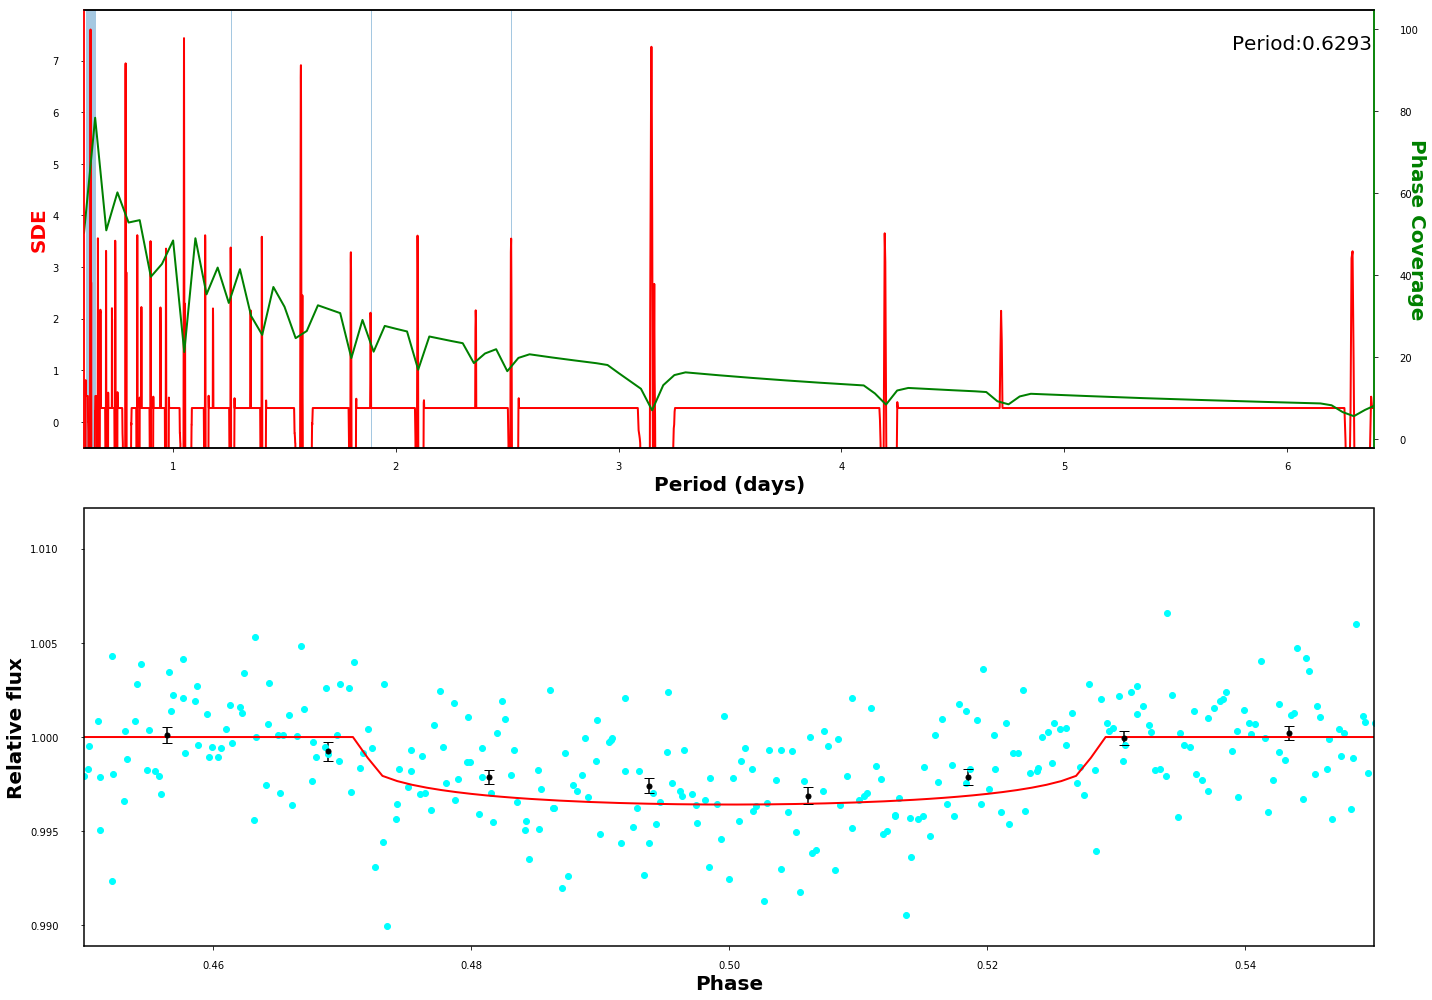

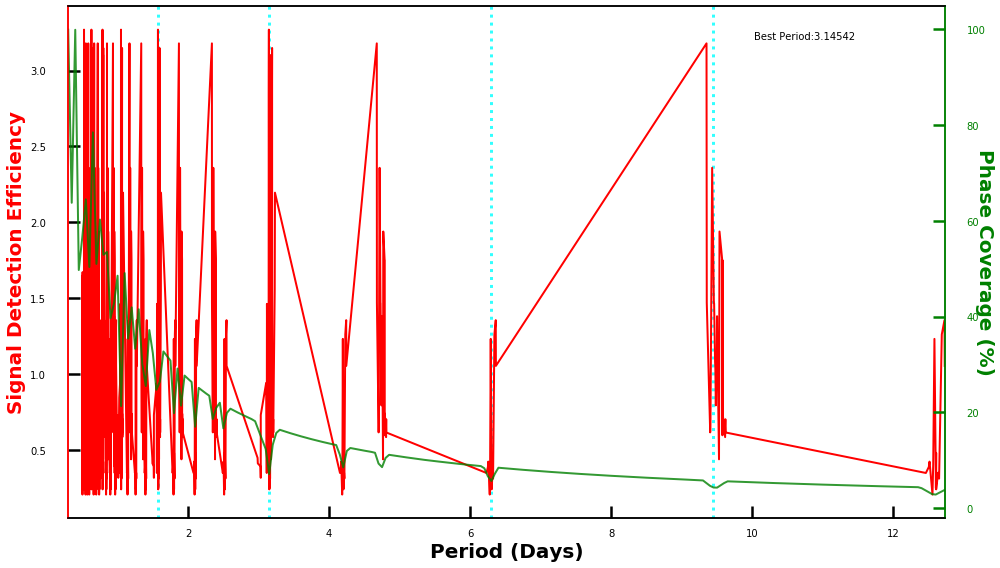

In [5]:
SVDSearch = GeneralTransitSearch()

SVDSearch.transitSearchParam['TStepSize'] = 5.0 #in Minutes
SVDSearch.transitSearchParam['TDurStepSize'] = 5.0 #in Minutes
SVDSearch.transitSearchParam['NCPUS'] = -1 #Use as many cores as available


#Run the detrending, TLS and transit pairing algorithm
SVDSearch.Run(Target1, ShowPlot=False, SavePlot=True)
SVDSearch.PeriodicSearch(Target1, method="TLS", ShowPlot=True)
SVDSearch.PeriodicSearch(Target1, method="TransitMatch", ShowPlot=True)


In [6]:
Now perform detailed MCMC fit.

SyntaxError: invalid syntax (<ipython-input-6-3a6eab134ab7>, line 1)

  0%|          | 8/5000 [00:00<01:06, 74.77it/s]

Now running MCMC for: 1


100%|██████████| 5000/5000 [00:56<00:00, 88.73it/s] 


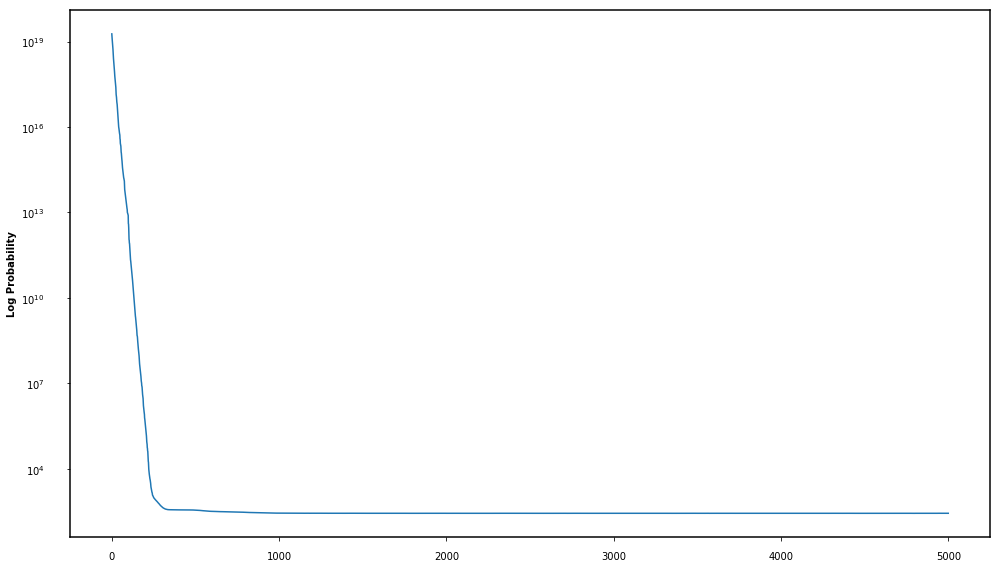

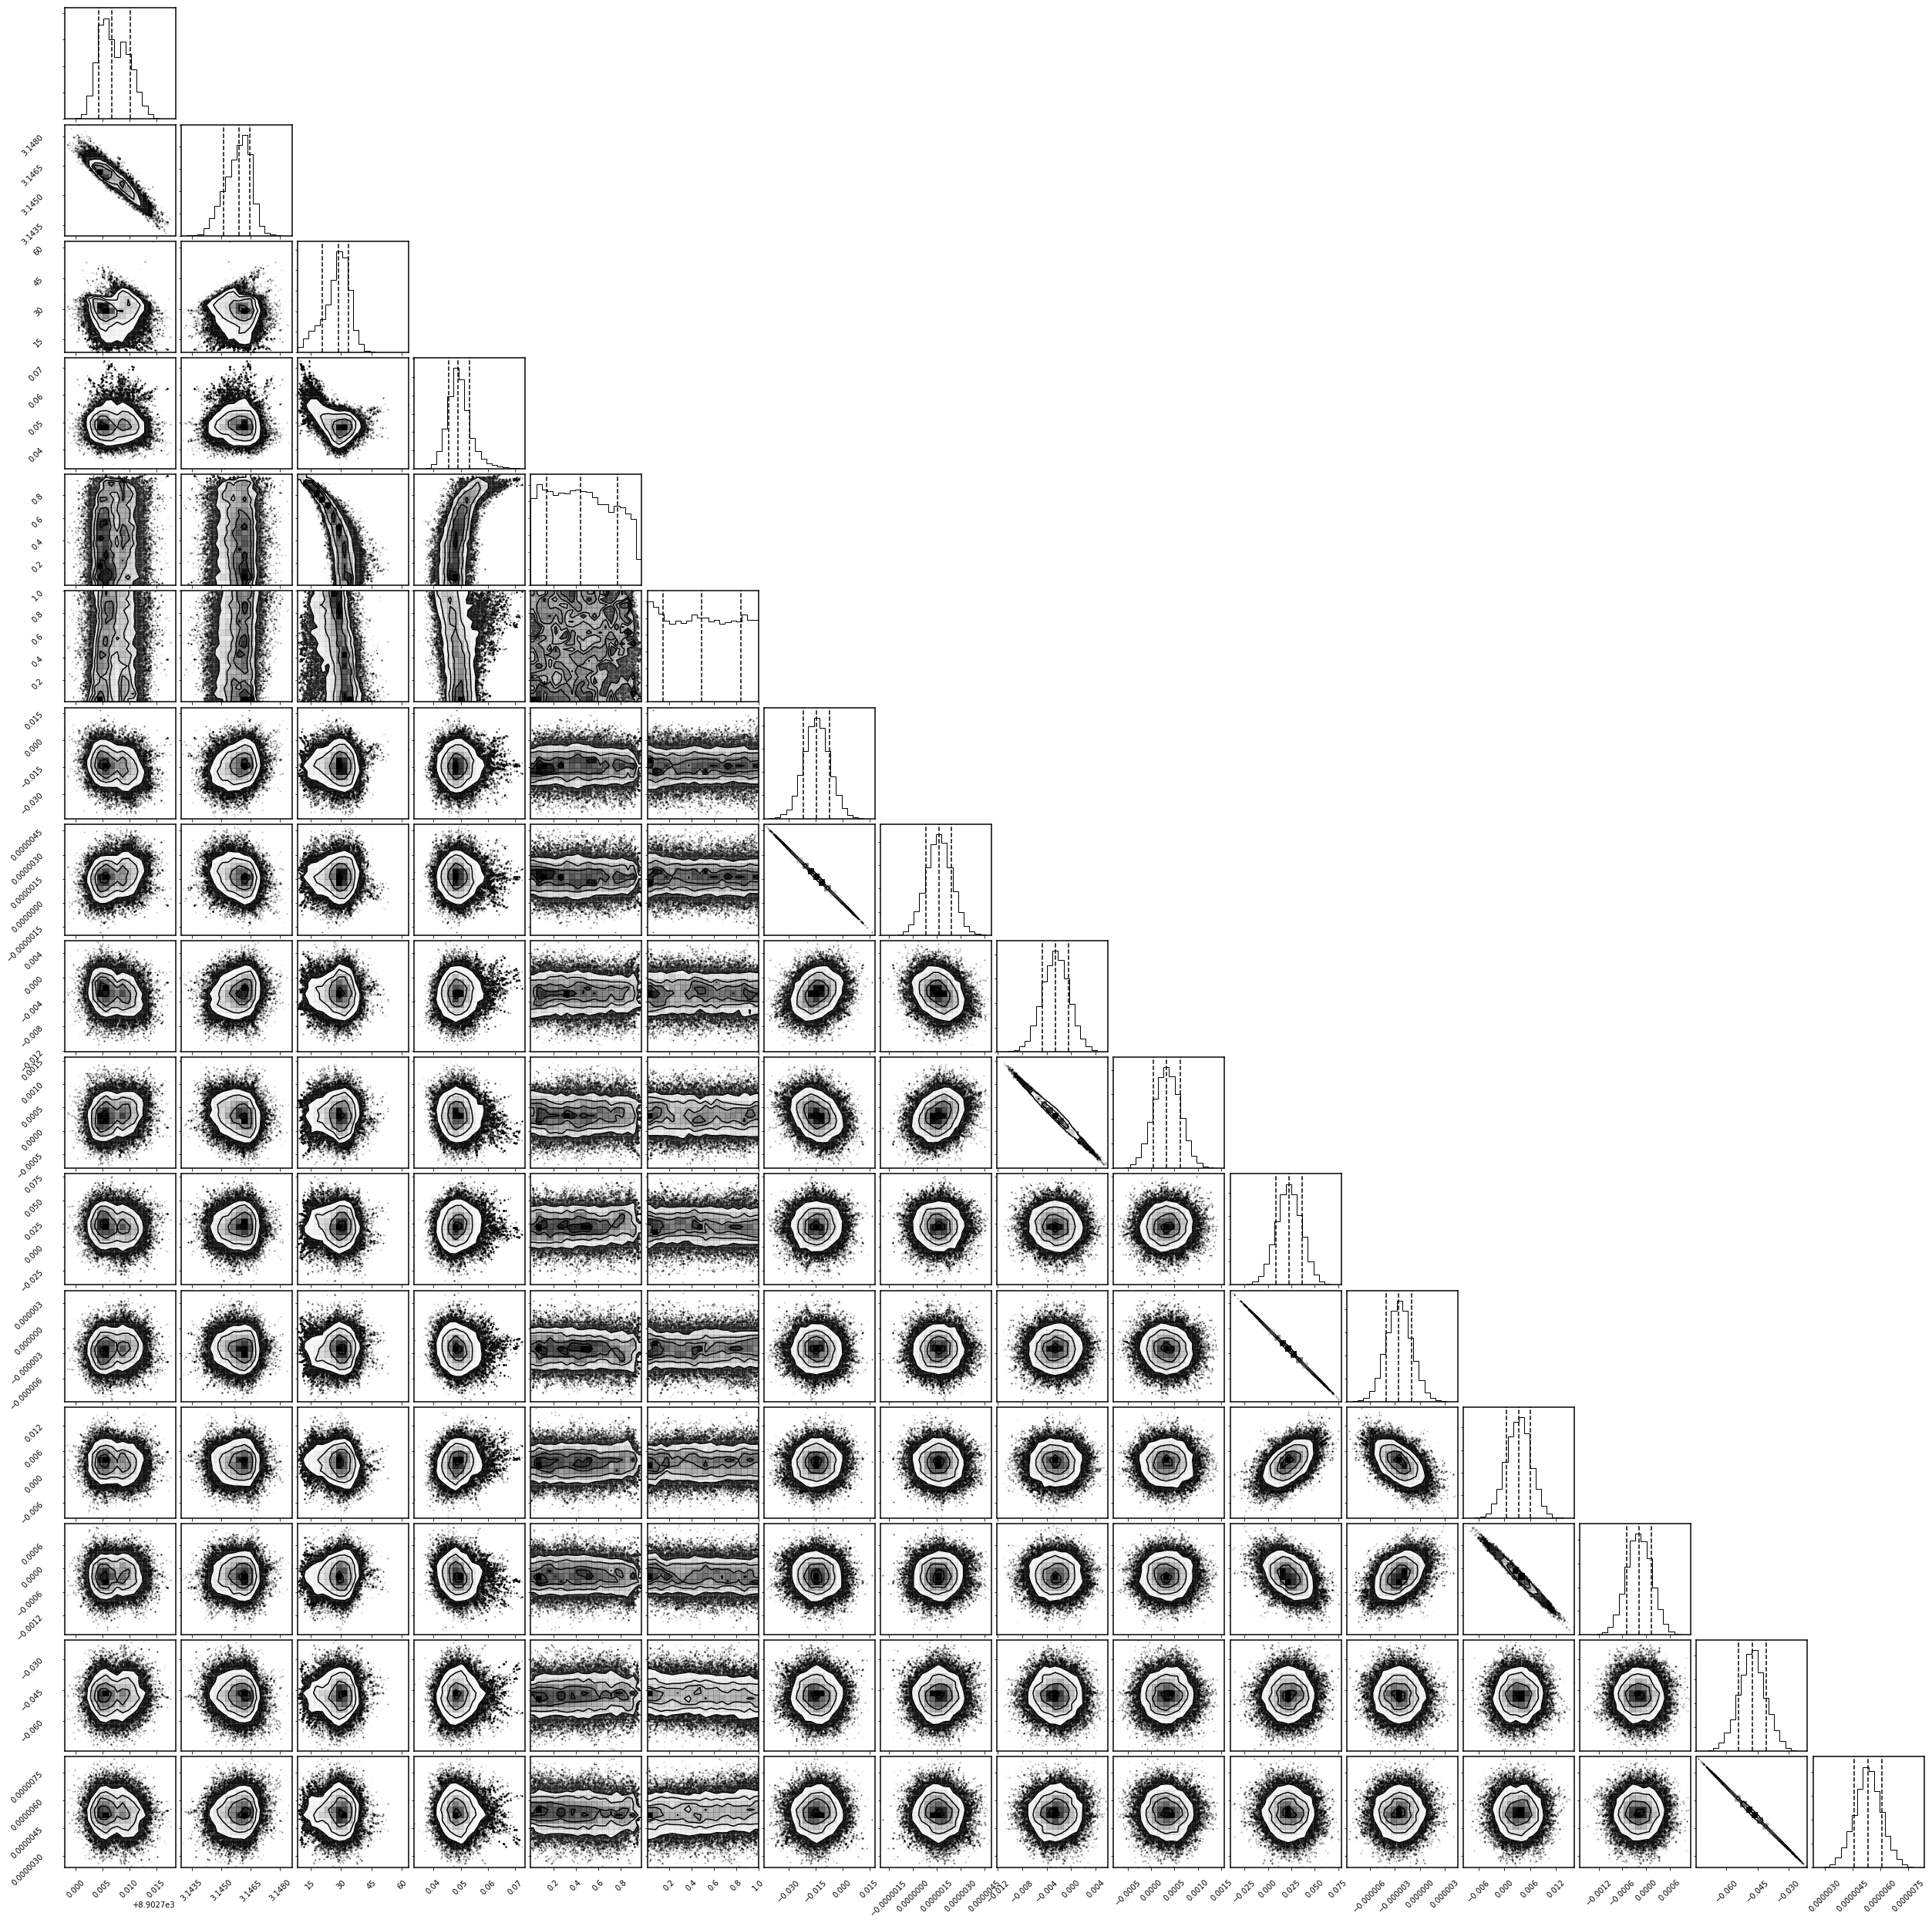

Saving figures from the MCMC


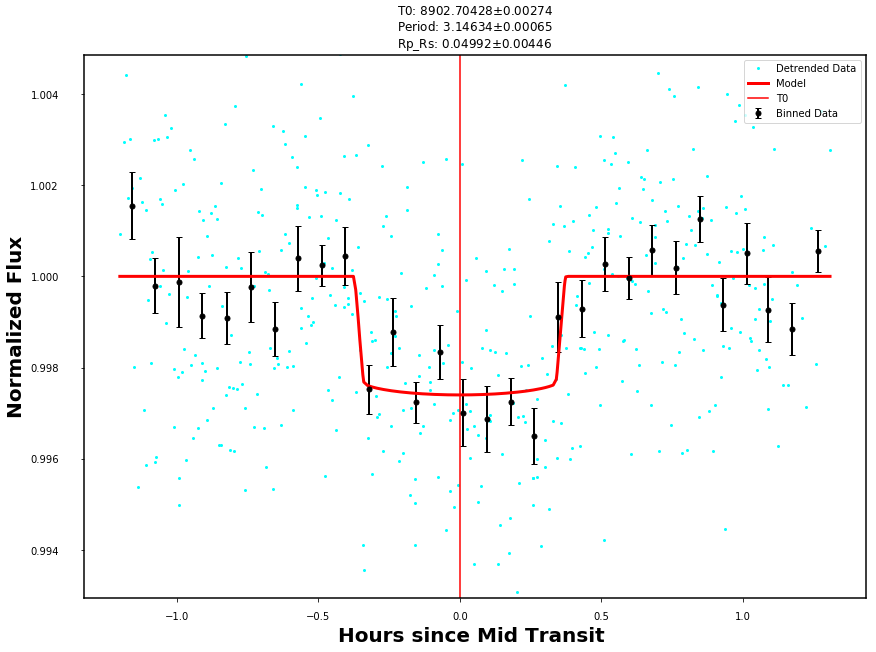

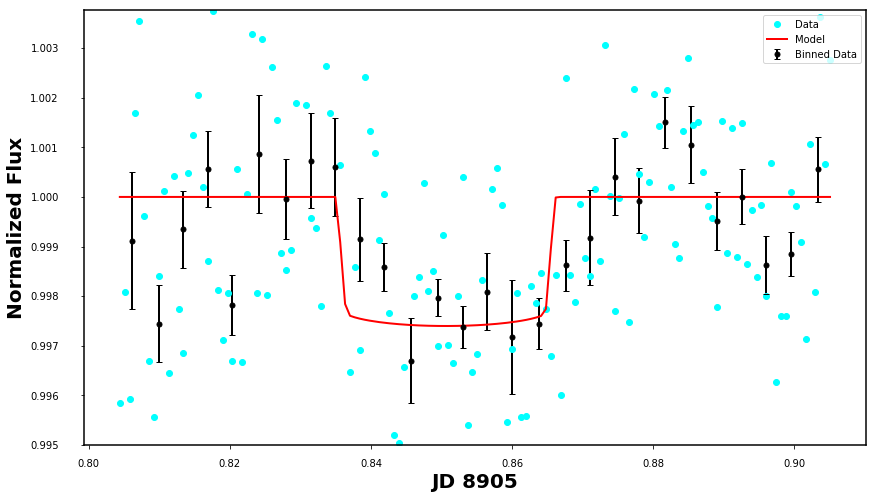

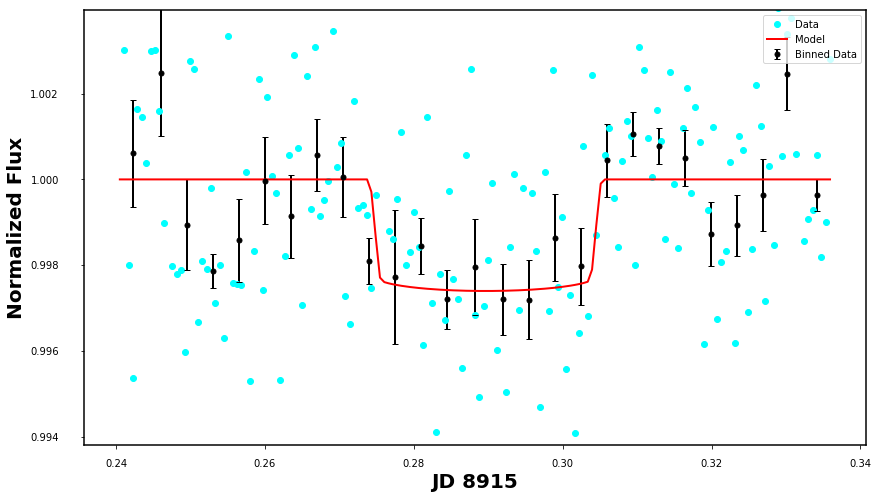

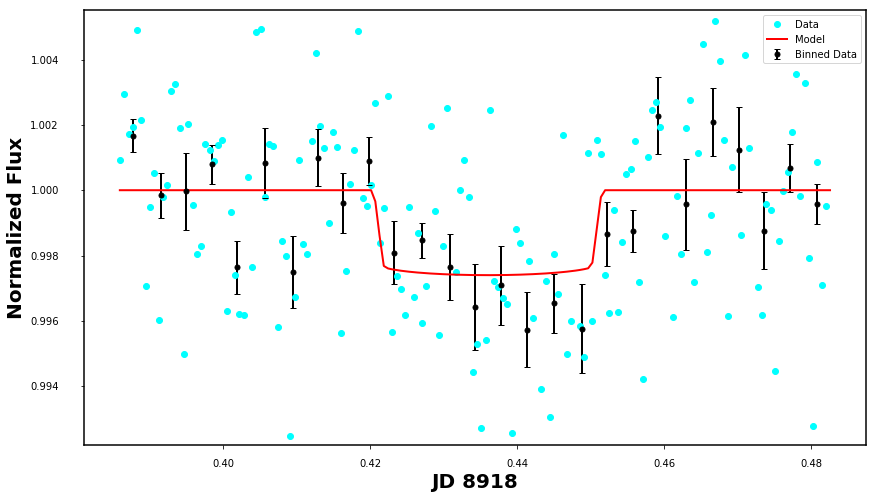

MCMC Run completed


In [7]:
#Now run MCMC using transit pairing as prior.
from splash.sampler import TransitFit

#Let us fit for the top 2.
TransitFit(Target1, SVDSearch, NRuns=5000, NumFits=1, TDur=2.5, Tolerance=0.035, ShowPlot=True)